# Seasonality test

This notebook performs seasonality tests by examination of the ACF and PACF of the first difference of the series.

Note that this notebook is different than the one called `seasonality-test-first-diff-of-acf.ipynb`, even though we use similar core techniques. In that notebook we do the ACF first, and then take the difference. I think it makes more sense to difference first, so let's explore that here.

Note that we might even want to do diff-ACF-diff. The first diff detrends, whereas the second diff allows us to find local maxima (i.e. look for zero-crossings corresponding to maxima). But this might not work so well for discrete signals like we're dealing with here.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.tools import diff

In [2]:
plt.rcParams["figure.figsize"] = [16, 5]
sns.set(style="whitegrid", color_codes=True)

In [3]:
def plot_series(ax, x, series_name):
    ax.plot(x)
    ax.set_title(series_name)

def plot_acf(ax, x, lags, title):
    """ACF or PACF"""
    ax.plot(x)
    ax.axhline(y=0, linestyle="--", color="gray")
    ax.axhline(y=1.96 / np.sqrt(len(x)), linestyle="--", color="gray")
    ax.axhline(y=-1.96 / np.sqrt(len(x)), linestyle="--", color="gray")
    ax.set_title(title)
    # ax.set_ylabel(title)

def find_seasonality(series_name, series_index, lags):
    x = pd.read_csv(f"../data/{series_name}.csv", header=0, usecols=[series_index]).squeeze("columns")
    x_d1 = diff(x)
    x_acf = acf(x_d1, nlags=lags)
    x_pacf = pacf(x_d1, nlags=lags)
    
    fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, tight_layout=True)
    plot_series(ax[0], x, series_name)
    plot_series(ax[1], x_d1, "First difference")
    plt.show()
    
    fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, tight_layout=True)
    plot_acf(ax[0], x_acf, lags, "ACF")
    plot_acf(ax[1], x_pacf, lags, "PACF")
    ax[1].set_xlabel("Lags")
    plt.show()


## Arrivals from Australia (monthly)

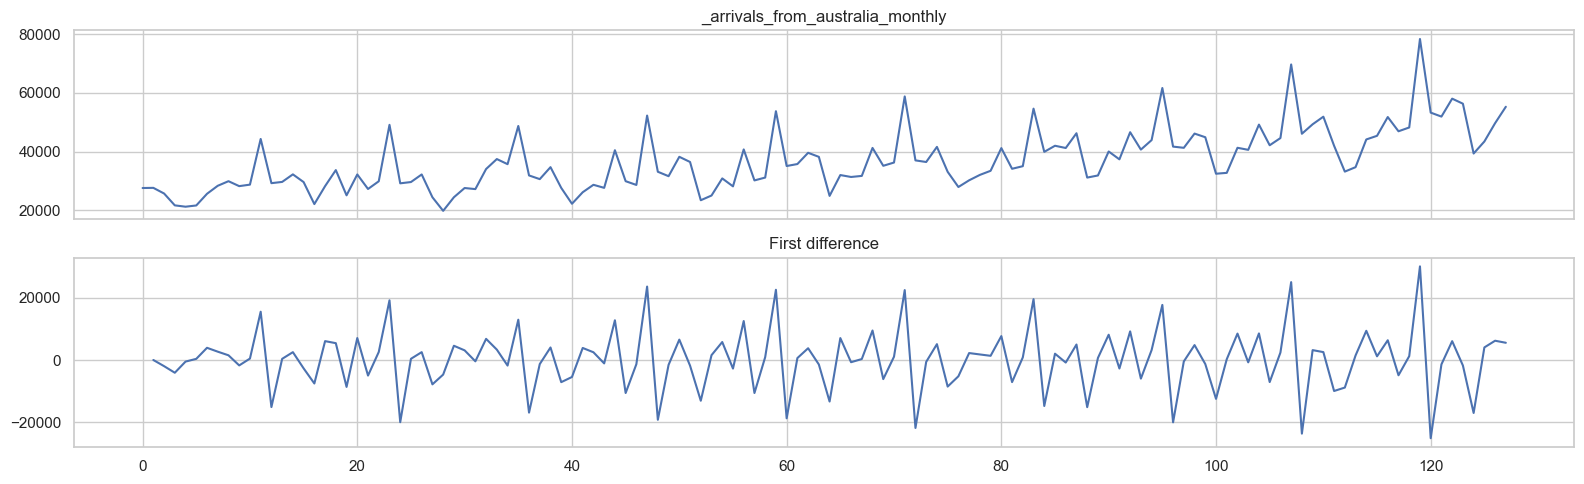

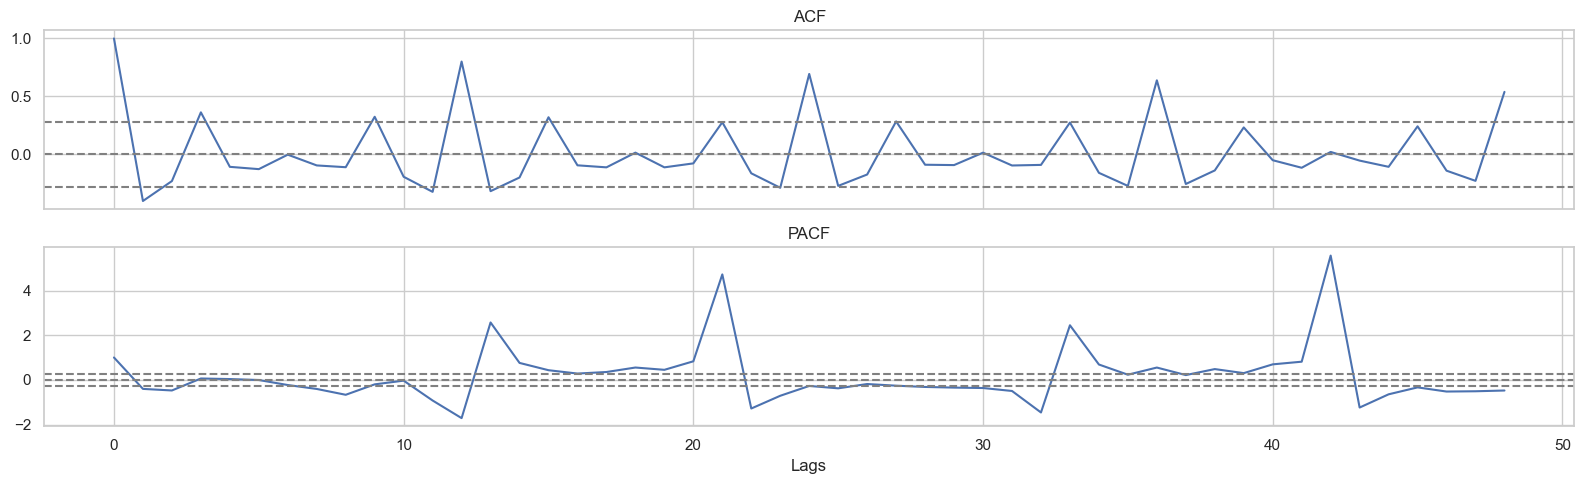

In [4]:
find_seasonality("_arrivals_from_australia_monthly", 1, 48)

Questions:
- Why does the PACF go over 1.0 above?
- Why doesn't the PACF line up with the ACF?

## Births and deaths

### Male live births

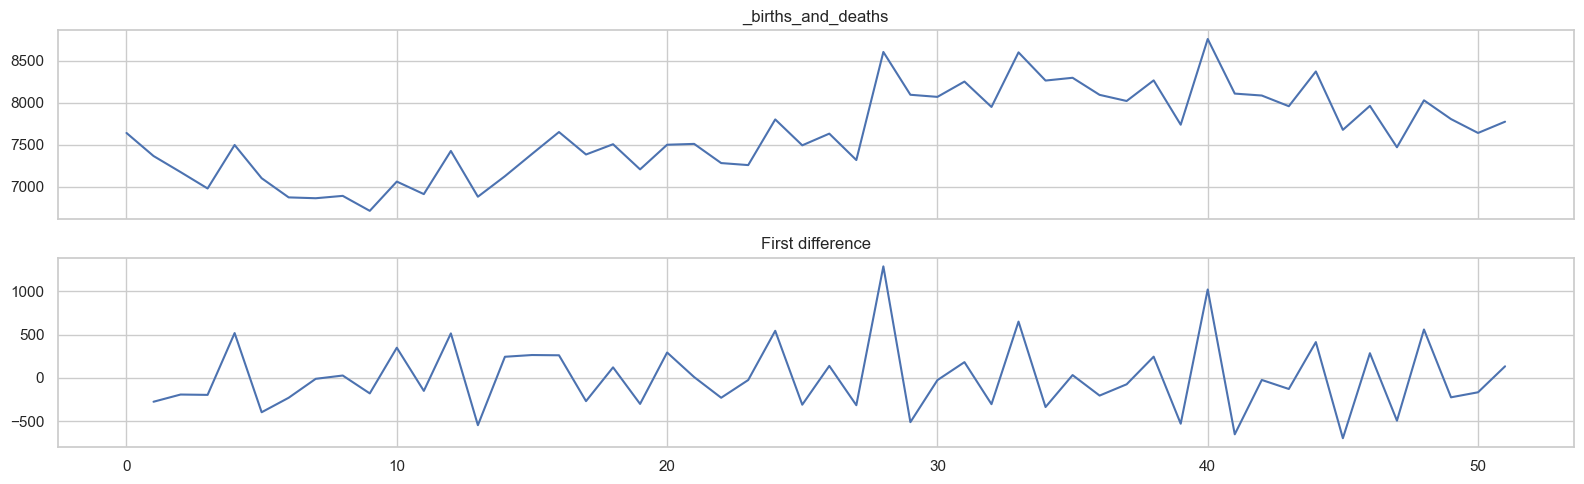

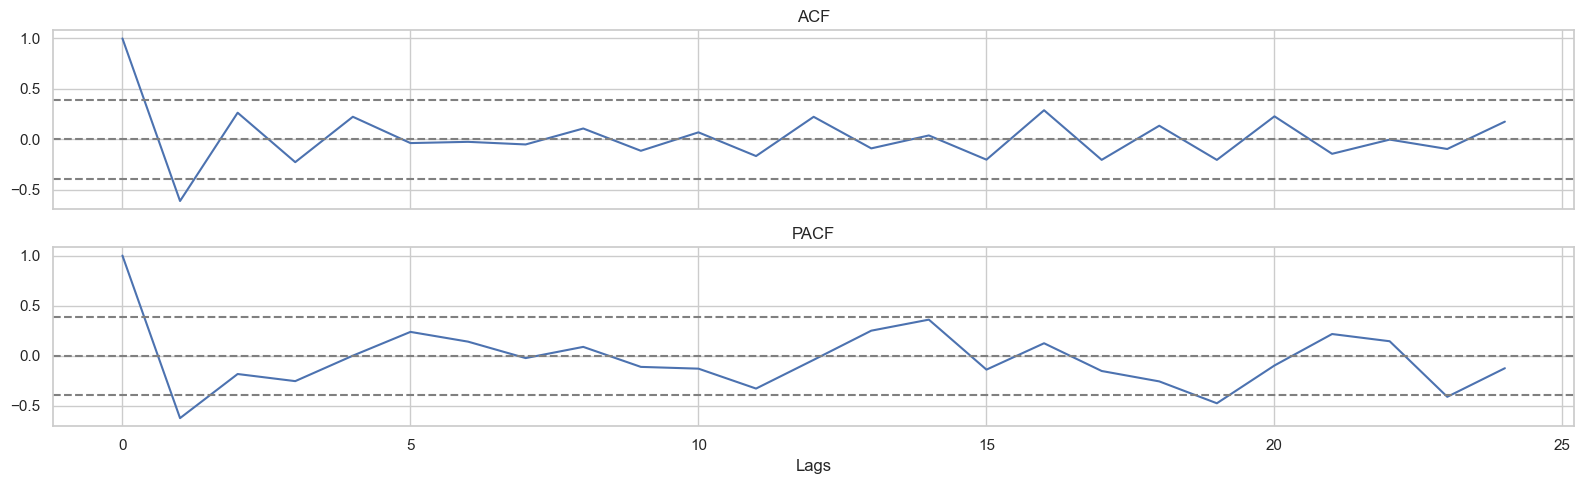

In [5]:
find_seasonality("_births_and_deaths", 1, 24)

## Imports

### Total Airports CIF

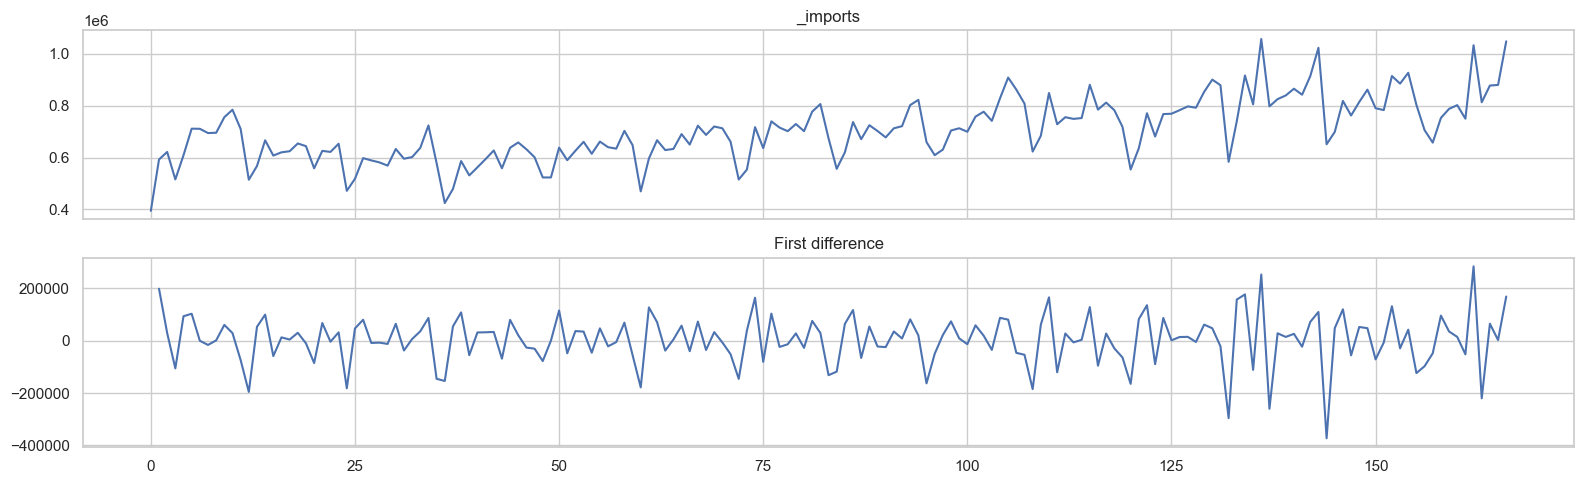

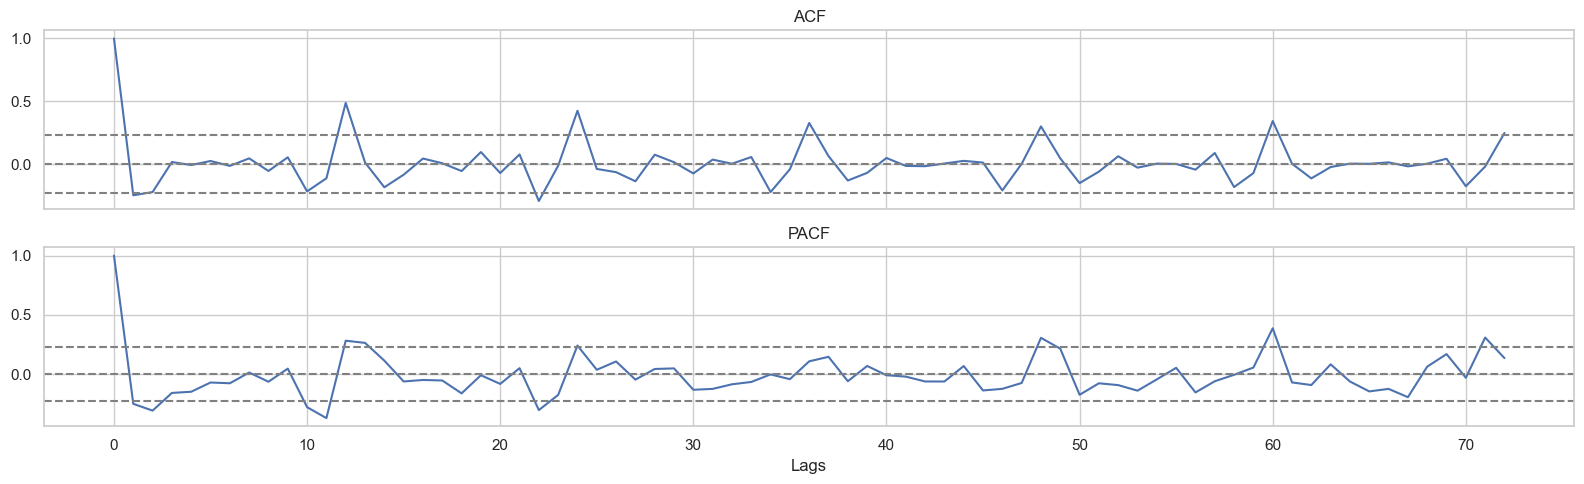

In [6]:
find_seasonality("_imports", 1, 72)

### Total Parcel Post CIF

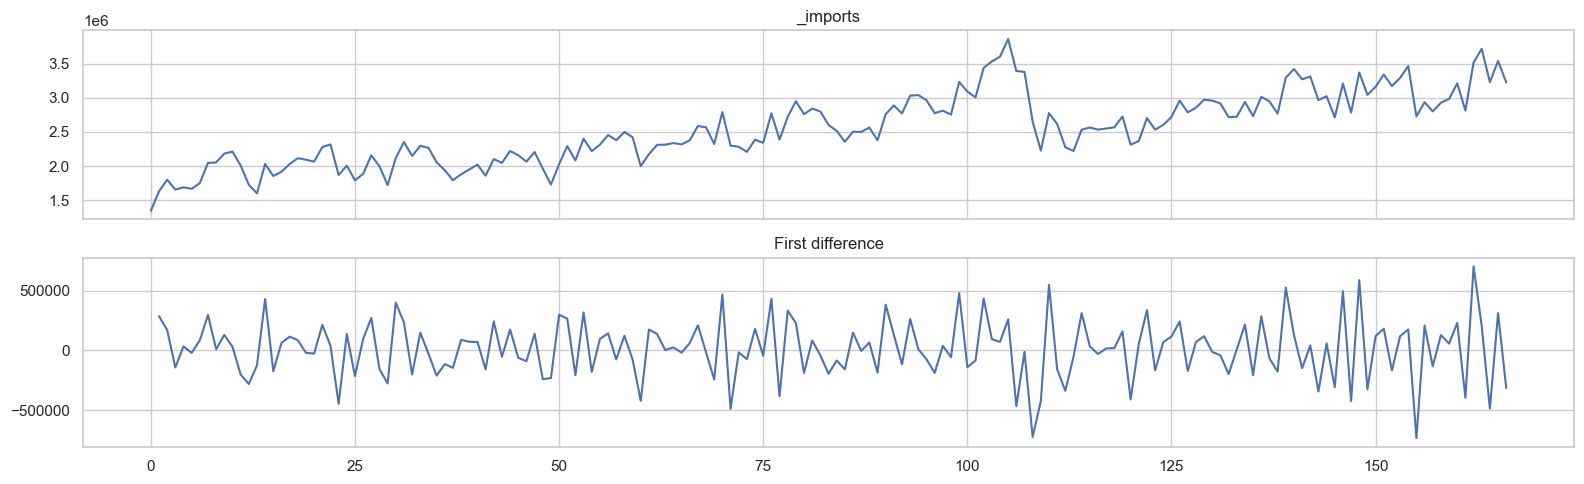

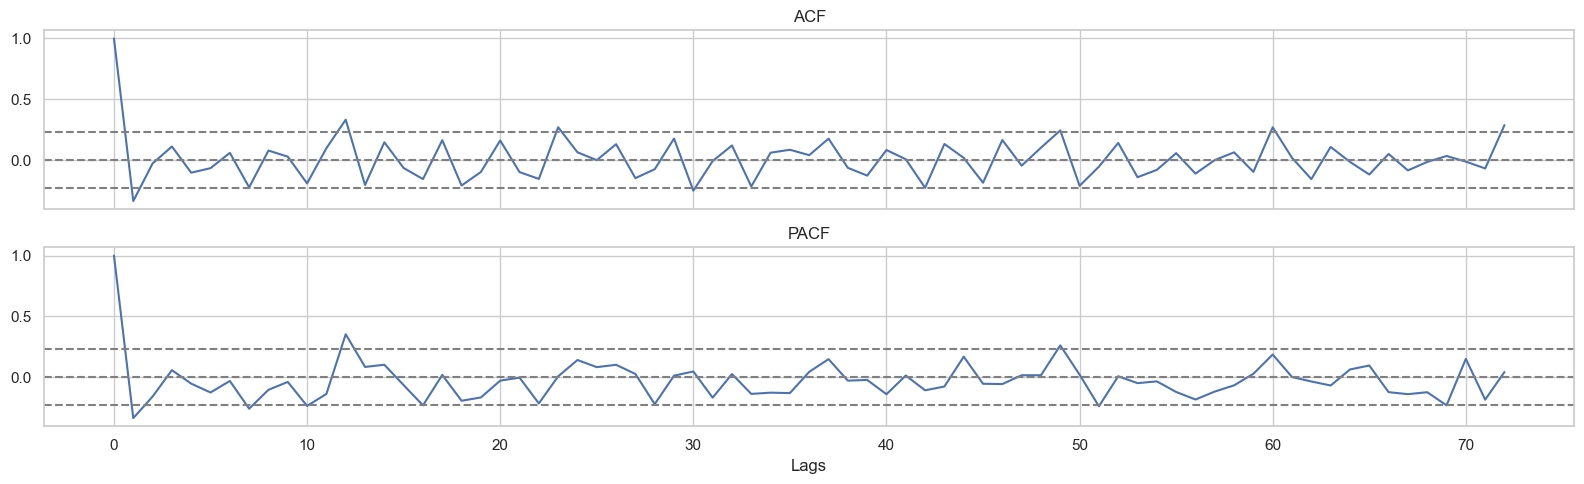

In [7]:
find_seasonality("_imports", 3, 72)

### Sea ice 

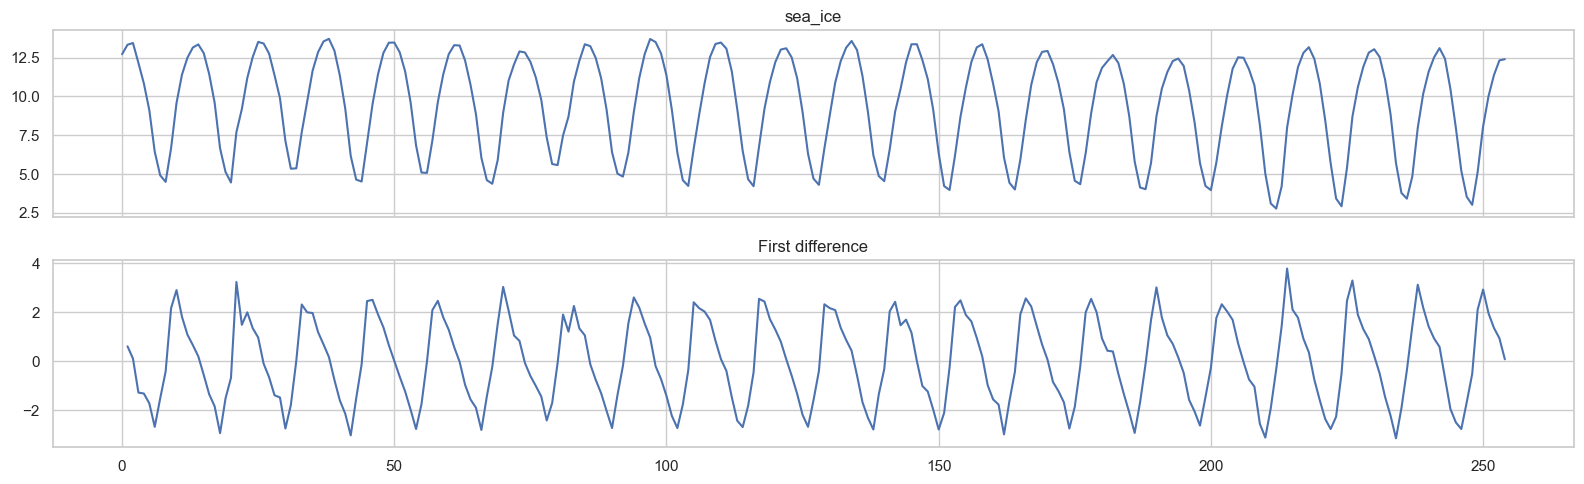

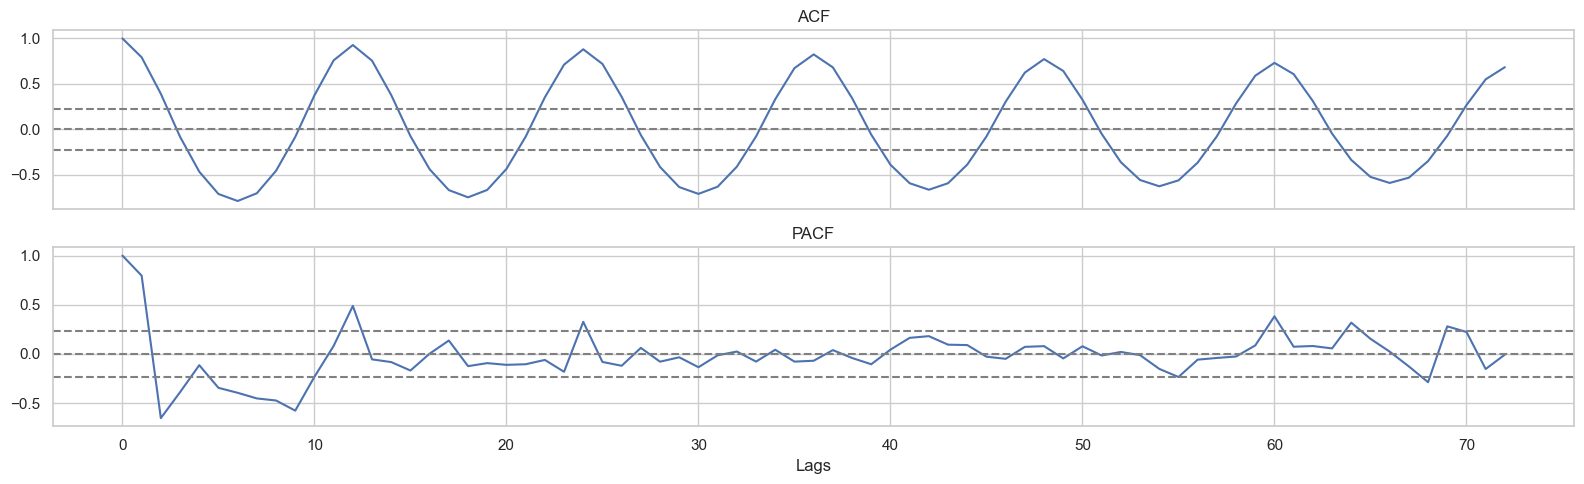

In [8]:
find_seasonality("sea_ice", 1, 72)